# of instances: 100


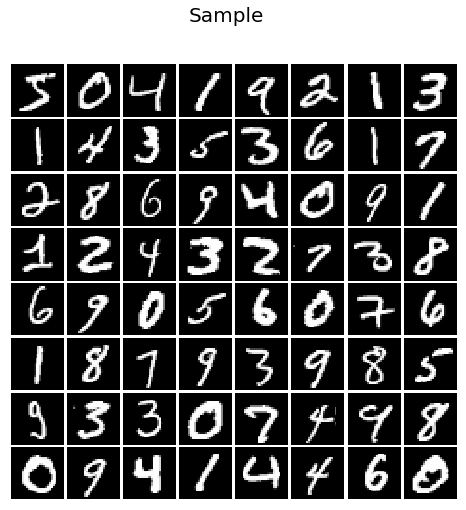

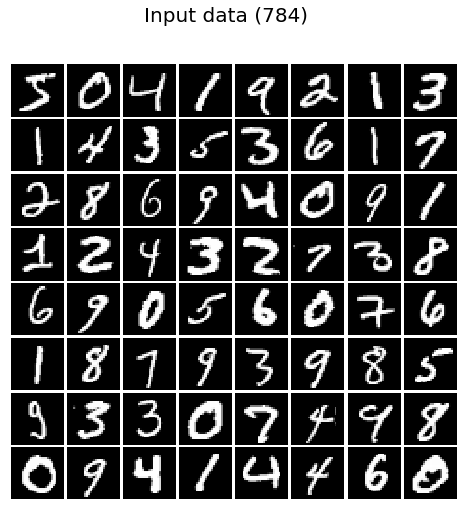

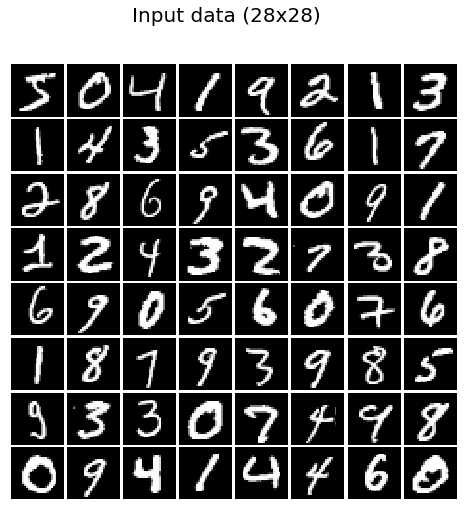

In [1]:
#
# COMMENTS TO DO
#

%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def plot(samples, w, h, fw, fh, iw=28, ih=28):
    fig = plt.figure(figsize=(fw, fh))
    gs = gridspec.GridSpec(w, h)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(iw, ih), cmap='Greys_r')

    return fig

DATA_PATH = "../DATASETS/"

f = open(DATA_PATH + "MNIST_LITE/mnist_train_lite.csv", 'r')

lines = f.readlines()

num_instances = len(lines)
INPUT_DIM = 784

print("# of instances: {}".format(num_instances))

f.close()

data = np.zeros((num_instances, INPUT_DIM), dtype=np.float32)
labels = np.zeros((num_instances), dtype=np.uint8)

for i,line in enumerate(lines):
    token=line.split()
    data[i,:] = token[:-1]
    labels[i] = token[-1]

num_labels = np.unique(labels[:]).shape[0]

fig=plot(data[:64], w=8, h=8, fw=8, fh=8, iw=28, ih=28)
fig.suptitle('Sample', fontsize=20)

BATCH_SIZE = 64

flat_images = tf.placeholder(tf.float32, shape=[BATCH_SIZE, 784])
labels = tf.placeholder(tf.uint8, shape=[BATCH_SIZE])

images = tf.reshape(flat_images, [BATCH_SIZE, 28, 28, 1])

labels_one_hot = tf.one_hot(labels, depth=10) 

n_batches = int(num_instances/BATCH_SIZE)

with tf.Session() as sess:

    tf.global_variables_initializer().run()
    
    random_batch = np.random.randint(n_batches, size=1)[0]
    
    batch_data = data[(random_batch) * BATCH_SIZE :(random_batch + 1) * BATCH_SIZE]
    batch_labels = labels[(random_batch) * BATCH_SIZE : (random_batch + 1) * BATCH_SIZE]

    out_flat_images, out_images = sess.run([flat_images, images], feed_dict={flat_images: batch_data})  
    
    fig=plot(out_flat_images, w=8, h=8, fw=8, fh=8, iw=28, ih=28)
    fig.suptitle('Input data (784)', fontsize=20)
    
    fig=plot(out_images, w=8, h=8, fw=8, fh=8, iw=28, ih=28)
    fig.suptitle('Input data (28x28)', fontsize=20)
